In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [466]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


In [467]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [468]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [469]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [471]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image


In [472]:
df=pd.read_csv(r'C:\Users\User\AppData\Local\Temp\b2c7e859-906d-430c-bc69-7e51291e8b85_archive.zip.b85\depression_data.csv')

In [473]:
df.head(10)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20,Single,High School,0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60,Widowed,Associate Degree,1,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,Yes,No,No
7,Charles Kaiser,31,Single,High School,0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


In [475]:
#EDA on data: 
df.shape

(413768, 16)

In [477]:
#info on data types
#data consists of 3 quantitative variables and the rest are categorical, qualitative variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [478]:
#statistical properties of quantitative variables
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [140]:
df.columns.tolist()

['Name',
 'Age',
 'Marital Status',
 'Education Level',
 'Number of Children',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Income',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental Illness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions']

In [141]:
# checking for null values in columns
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [142]:
# number of unique values in each column
df.nunique()

Name                            196851
Age                                 63
Marital Status                       4
Education Level                      5
Number of Children                   5
Smoking Status                       3
Physical Activity Level              3
Employment Status                    2
Income                          405282
Alcohol Consumption                  3
Dietary Habits                       3
Sleep Patterns                       3
History of Mental Illness            2
History of Substance Abuse           2
Family History of Depression         2
Chronic Medical Conditions           2
dtype: int64

<Axes: xlabel='Income'>

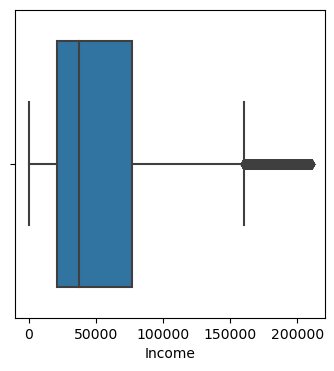

In [481]:
# outlier detection for quantitative variables (Income)-Box-Plot, Box plot is a data visualization plotting function. It shows the min, max, median, first quartile, and third quartile.
plt.figure(figsize=[4,4])
sns.boxplot(x=df['Income'])

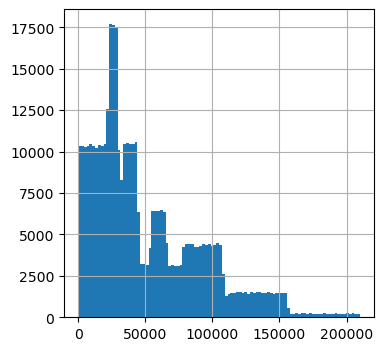

In [144]:
#distirbution of the variable income
#we see most of population belongs in te 25,000 income level and dist is sknewed to the right
df['Income'].hist(figsize=(4,4),bins=100)
plt.show()

In [145]:
#The Interquartile Range, or IQR, is a measure of statistical dispersion.
#It represents the range within which the middle 50% of the data falls. To calculate the IQR, you need to find the difference between the 75th percentile (Q3) and the 25th percentile (Q1).
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

55615.270000000004


<Axes: xlabel='Income', ylabel='Employment Status'>

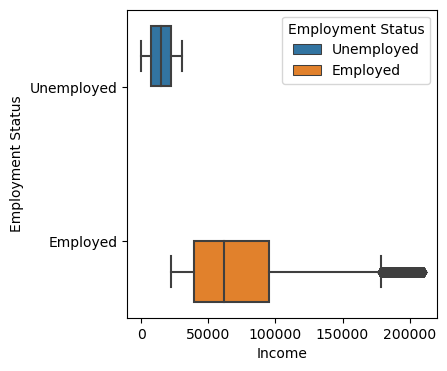

In [541]:
plt.figure(figsize=[4,4])
sns.boxplot(x = df['Income'], 
            y = df['Employment Status'], 
            hue = df['Employment Status'])

<Axes: xlabel='Income', ylabel='Education Level'>

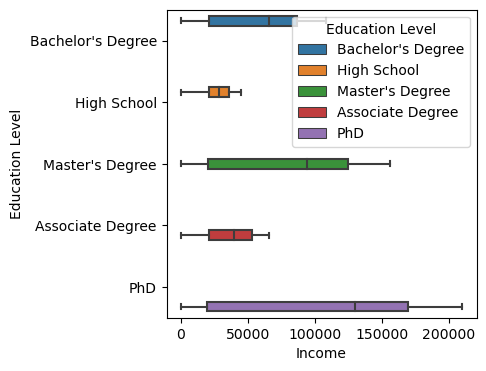

In [542]:
plt.figure(figsize=[4,4])
sns.boxplot(x = df['Income'], 
            y = df['Education Level'], 
            hue = df['Education Level'])

<Axes: xlabel='Income', ylabel='History of Mental Illness'>

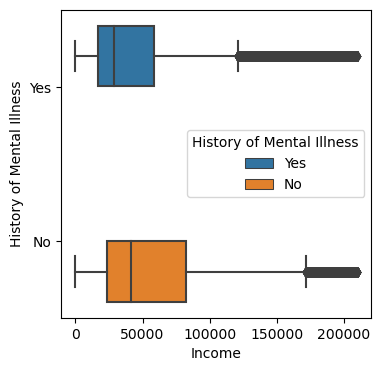

In [543]:
plt.figure(figsize=[4,4])
sns.boxplot(x = df['Income'], 
            y = df['History of Mental Illness'], 
            hue = df['History of Mental Illness'])

<Axes: xlabel='Income', ylabel='Dietary Habits'>

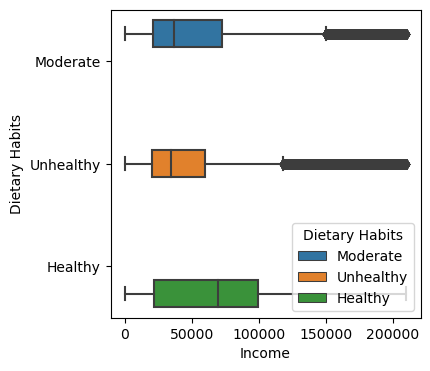

In [545]:
plt.figure(figsize=[4,4])
sns.boxplot(x = df['Income'], 
            y = df['Dietary Habits'], 
            hue = df['Dietary Habits'])

In [234]:
#remove income values outside IQR, and determine the shape of the new dataframe after outlier removal
df1 = df[~((df['Income'] < (Q1 - 1.5 * IQR)) |(df['Income'] > (Q3 + 1.5 * IQR)))]
df1.shape

(408611, 16)

<Axes: xlabel='Age'>

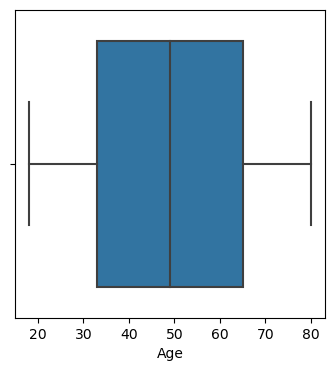

In [482]:
#box plot for age does not show any outliers
plt.figure(figsize=[4,4])
sns.boxplot(x=df['Age'])

<Axes: xlabel='History of Mental Illness', ylabel='count'>

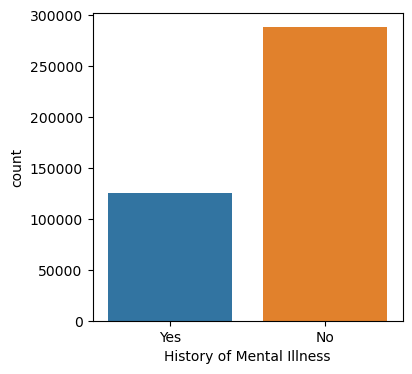

In [216]:
#we look at the disribution of the values in the target variable, we see an imbalaced dataset
#hile~70% of the population does not have mental ilness, 30% is diagnoised with mental ilness
plt.figure(figsize=[4,4])
sns.countplot(data = df, x = 'History of Mental Illness')

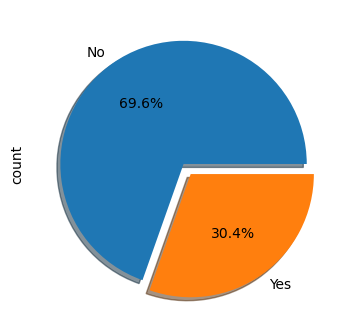

In [215]:
plt.figure(figsize=[4,4])
df['History of Mental Illness'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [168]:
df1.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

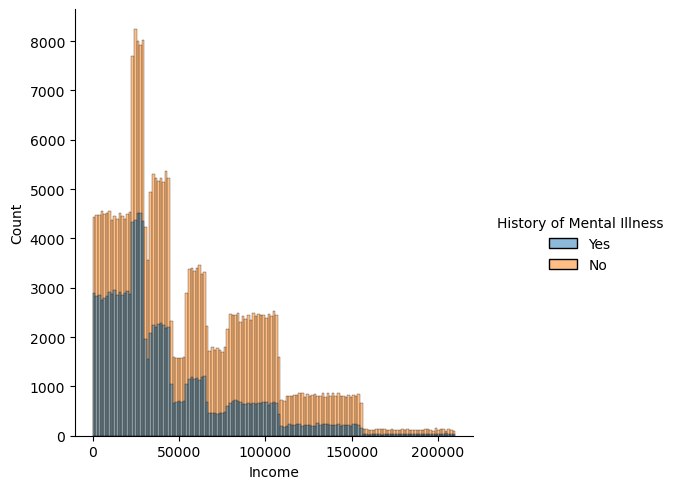

In [169]:
#we check distribution of income across the mentall health group and we see lower instances of mentall ilness with an increase in income
sns.displot(df, x="Income", hue="History of Mental Illness")

In [170]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [171]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [483]:
#these 3 categorical variables below, we use ordinal encoding since they have a natural rank ordering, here the order of ranking is preserved
ord_cols=[ 'Employment Status', 'Alcohol Consumption', 'Sleep Patterns']

In [484]:
df_ord=df1.loc[:, ord_cols]

In [485]:
df_ord

,Employment Status,Alcohol Consumption,Sleep Patterns
0,0,1,1
1,1,0,1
2,1,2,2
3,0,1,0
4,0,2,1
...,...,...,...
413763,1,2,2
413764,1,2,0
413765,1,1,1
413766,0,1,0


In [486]:
df1['Employment Status'].unique()

array([0, 1], dtype=int64)

In [487]:
level_mapping={'Unemployed':0,'Employed':1}
df1['Employment Status']=df1['Employment Status'].replace(level_mapping)

In [488]:
df1['Alcohol Consumption'].unique()

array([1, 0, 2], dtype=int64)

In [489]:
level_mapping={'High':0,'Moderate':1, 'Low':2 }
df1['Alcohol Consumption']=df1['Alcohol Consumption'].replace(level_mapping)

In [490]:
df1['Sleep Patterns'].unique()

array([1, 2, 0], dtype=int64)

In [491]:
level_mapping={'Poor':0,'Fair':1, 'Good':2 }
df1['Sleep Patterns']=df1['Sleep Patterns'].replace(level_mapping)

In [492]:
# for the rest of the categorical variables we use label encoder
label_cols=['Marital Status', 'Smoking Status', 'Physical Activity Level', 'Education Level',
       'Dietary Habits','History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions']

In [493]:
label_encoder = LabelEncoder()
for i in label_cols:
    df1[i] = label_encoder.fit_transform(df1[i])

In [495]:
# df1 is the new convereted dataset, where the categorical variables are encoded
df1.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,0,26265.67,1,1,1,1,0,1,1
1,55,1,2,1,2,2,1,42710.36,0,2,1,1,0,0,1
2,78,3,3,1,2,2,1,125332.79,2,2,2,0,0,1,0
3,58,0,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,2,2,0,2,2,0,8595.08,2,1,1,1,0,1,1


In [ ]:
#train test split on categorical variables, 80% training data, 20% test data
X = df1.drop([ 'index','Name', 'History of Mental Illness', 'Age', 'Income', 'Number of Children' ], axis = 1)
Y = df1['History of Mental Illness']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [208]:

def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=chi2, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

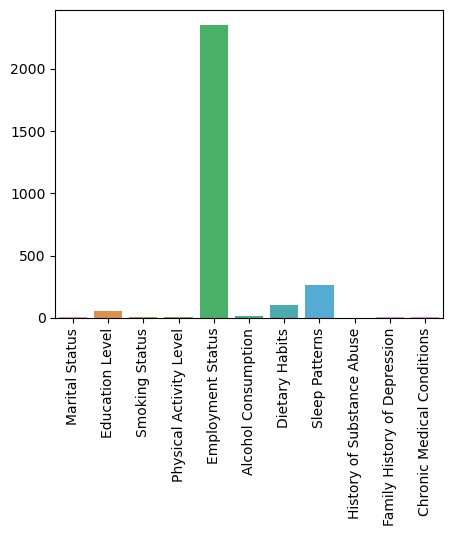

In [211]:
#It is used to determine whether there is a significant association between two categorical variables. In the context of feature selection,
#The chi-square test can be used to identify the features that are most strongly associated with the target variable.
names = []
values = []
cat_data = X_train
for i in range(len(fs.scores_)):
    names.append(cat_data.columns[i])
    values.append(fs.scores_[i])
chi_list = zip(names, values)

# next we plot the scores, showing the importance with respect to the 'mental ilness target variable'
plt.figure(figsize=(5,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

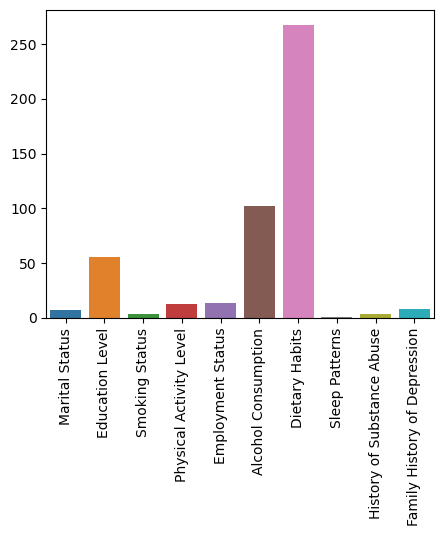

In [120]:
## since employment is dominating in the previous chart, we make another plot of feature importnace for clearer visualizaton
names = []
values = []
cat_data = X_train
for i in range(len(fs.scores_)):
    names.append(cat_data.columns[i])
    values.append(fs.scores_[i])
chi_list = zip(names, values)

# plot the scores
plt.figure(figsize=(5,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

In [213]:
#Names of top 5 categorial features
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, 5)
fs.get_feature_names_out()
 

array(['Education Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns'], dtype=object)

In [195]:
#Next we analyse the numerical features
df_num= df1.loc[:, [  'Age', 'Income', 'Number of Children' ]]

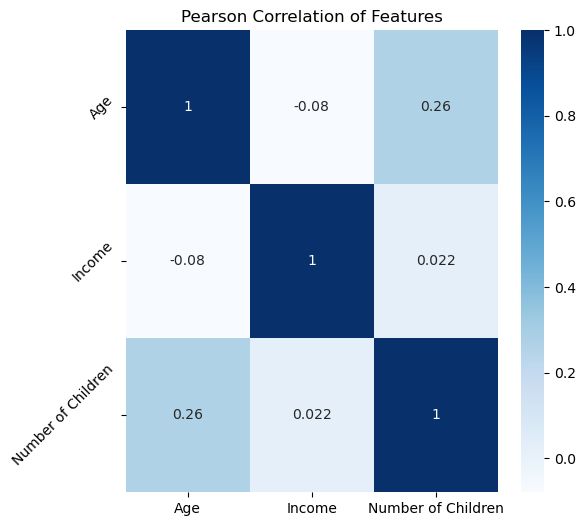

In [197]:
#the numercial features show no instance of multi colleneraity
corr = df_num.corr()

f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

In [199]:
X = df1.drop([ 'index','Name', 'History of Mental Illness' ], axis=1).values
y = df1['History of Mental Illness'].values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (326888, 14)
Shape of Test Features: (81723, 14)
Shape of Train Target: (326888,)
Shape of Test Target: (81723,)


In [221]:
#EDA data shape analysis
y_train=pd.Series(y_train)
print(y_train.value_counts())
Total = np.add(y_train.where(y_train==1).value_counts(), 
               y_train.where(y_train==0).value_counts())
print('mental ilness 1 : ',(y_train.where(y_train==1).value_counts()/Total)*100)
print('mental ilness : ',100 - (y_train.where(y_train==1).value_counts()/Total)*100)

0    227108
1     99780
Name: count, dtype: int64
mental ilness 1 :  0.0   NaN
1.0   NaN
Name: count, dtype: float64
mental ilness :  0.0   NaN
1.0   NaN
Name: count, dtype: float64


In [253]:
df1

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,0,26265.67,1,1,1,1,0,1,1
1,55,1,2,1,2,2,1,42710.36,0,2,1,1,0,0,1
2,78,3,3,1,2,2,1,125332.79,2,2,2,0,0,1,0
3,58,0,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,2,2,0,2,2,0,8595.08,2,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,1,3,0,1,1,1,109233.43,2,0,2,0,0,0,0
413764,26,2,1,0,0,0,1,96760.97,2,0,0,1,1,0,1
413765,57,1,1,0,2,2,1,77353.26,1,1,1,0,0,1,1
413766,71,1,0,2,2,2,0,24557.08,1,1,0,0,1,0,0


In [238]:
df1=df1.drop(['Name'],  axis=1)

In [254]:
df1

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,0,26265.67,1,1,1,1,0,1,1
1,55,1,2,1,2,2,1,42710.36,0,2,1,1,0,0,1
2,78,3,3,1,2,2,1,125332.79,2,2,2,0,0,1,0
3,58,0,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,2,2,0,2,2,0,8595.08,2,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,1,3,0,1,1,1,109233.43,2,0,2,0,0,0,0
413764,26,2,1,0,0,0,1,96760.97,2,0,0,1,1,0,1
413765,57,1,1,0,2,2,1,77353.26,1,1,1,0,0,1,1
413766,71,1,0,2,2,2,0,24557.08,1,1,0,0,1,0,0


In [255]:
#Next we use the standard sclar to scale the variables
#The concept of standardization comes into picture when continuous independent variables are measured at different scales. 
#It means these variables do not give equal contribution to the analysis.
scaler = StandardScaler() 
X = df1.drop(['History of Mental Illness' ], axis=1).values
y = df1['History of Mental Illness'].values
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split( 
        X, Y, test_size=1/3, random_state=0) 
  

In [284]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.001, 0.01, 0.0001)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_train, Y_train)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 0.0016000000000000003}


In [285]:
names=df1.drop('History of Mental Illness', axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['Age' 'Marital Status' 'Education Level' 'Number of Children'
 'Smoking Status' 'Physical Activity Level' 'Employment Status' 'Income'
 'Alcohol Consumption' 'Dietary Habits' 'Sleep Patterns'
 'History of Substance Abuse' 'Family History of Depression'
 'Chronic Medical Conditions']


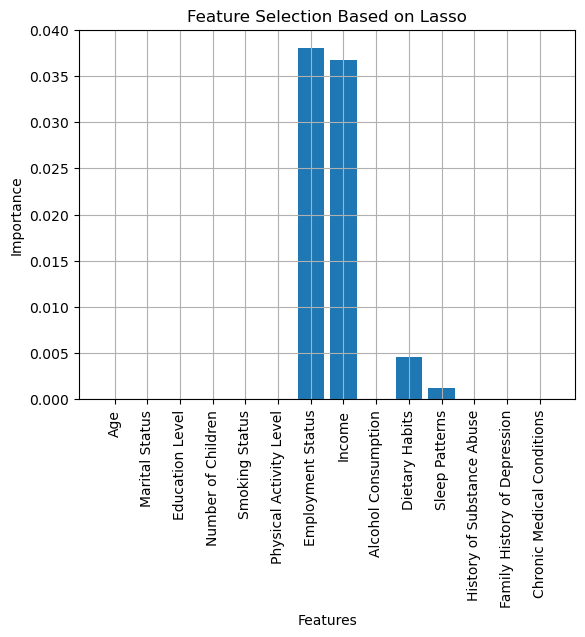

In [295]:
# Feature importance basis Lasso regression, Employment and Income are the two most important variables
lasso1 = Lasso(alpha= 0.0016)
lasso1.fit(X_train, Y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.04)
plt.show()

In [298]:
# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, "History of Mental Illness")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['Employment Status' 'Income' 'Dietary Habits' 'Sleep Patterns']
Selected Columns: ['Employment Status' 'Income' 'Dietary Habits' 'Sleep Patterns'
 'History of Mental Illness']


In [407]:
df2=df1.loc[:, ['Employment Status', 'Income' ,'Dietary Habits', 'Sleep Patterns',
 'History of Mental Illness', 'Alcohol Consumption', 'Age']]

In [519]:
df2

,Employment Status,Income,Dietary Habits,Sleep Patterns,History of Mental Illness,Alcohol Consumption,Age
0,0,26265.67,1,1,1,1,31
1,1,42710.36,2,1,1,0,55
2,1,125332.79,2,2,0,2,78
3,0,9992.78,1,0,0,1,58
4,0,8595.08,1,1,1,2,18
...,...,...,...,...,...,...,...
413763,1,109233.43,0,2,0,2,68
413764,1,96760.97,0,0,1,2,26
413765,1,77353.26,1,1,0,1,57
413766,0,24557.08,1,0,0,1,71


In [520]:
mlp = MLPClassifier(max_iter=20)

In [521]:
X=df2.drop('History of Mental Illness', axis=1)

In [522]:
Y=df2['History of Mental Illness']

In [523]:
X_train, X_test, y_train, y_test = train_test_split( 
        X, Y, test_size=0.30, random_state=42) 
  

In [524]:
parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,100, 50)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05, 0.1],
}

In [525]:
clf = GridSearchCV(mlp, parameter_space, scoring='f1', cv=2)
clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=20),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(50, 50), (50, 100, 50)]},
             scoring='f1')

In [526]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50)}


In [527]:
print( clf.best_score_)

0.24226559779498863


In [529]:
pred=clf.predict(X_test)
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.61      0.06      0.11     85208
           1       0.30      0.91      0.45     37376

    accuracy                           0.32    122584
   macro avg       0.46      0.49      0.28    122584
weighted avg       0.52      0.32      0.21    122584



In [530]:
print(confusion_matrix(y_test, pred)) 

[[ 5161 80047]
 [ 3270 34106]]


In [531]:
print(accuracy_score(y_test, pred)) 

0.3203272857795471


In [532]:
print(f1_score(y_test, pred)) 

0.45015805555372246


In [533]:
#Recall: Out of all the people that actually did have mentall ilness, the model predicted this outcome correctly for 91% of those people.
print(recall_score(y_test, pred)) 

0.9125107020547946


In [518]:
df1

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,0,26265.67,1,1,1,1,0,1,1
1,55,1,2,1,2,2,1,42710.36,0,2,1,1,0,0,1
2,78,3,3,1,2,2,1,125332.79,2,2,2,0,0,1,0
3,58,0,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,2,2,0,2,2,0,8595.08,2,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,1,3,0,1,1,1,109233.43,2,0,2,0,0,0,0
413764,26,2,1,0,0,0,1,96760.97,2,0,0,1,1,0,1
413765,57,1,1,0,2,2,1,77353.26,1,1,1,0,0,1,1
413766,71,1,0,2,2,2,0,24557.08,1,1,0,0,1,0,0


In [446]:
X=df1.drop('History of Mental Illness', axis=1)
Y=df1['History of Mental Illness']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)

In [447]:
#1) Random Forest Evaluation before feature selection


rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy_before = rf.score(X_test, y_test)
print(f'Accuracy after before selection: {accuracy_before:.2f}')

Accuracy after before selection: 0.67


In [448]:
pred=rf.predict(X_test)
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.70      0.90      0.79     85166
           1       0.36      0.13      0.19     37418

    accuracy                           0.67    122584
   macro avg       0.53      0.51      0.49    122584
weighted avg       0.60      0.67      0.61    122584



In [449]:
print(f1_score(y_test, pred)) 

0.1872110787056326


In [450]:
print(recall_score(y_test, pred)) 

0.12608904805173982


In [451]:
print(precision_score(y_test, pred)) 

0.3633423180592992


In [453]:
#1) Random Forest Evaluation after feature selection

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:8].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

                         Feature  Importance
7                         Income    0.380617
0                            Age    0.245621
3             Number of Children    0.056654
8            Alcohol Consumption    0.043492
2                Education Level    0.039056
5        Physical Activity Level    0.032322
10                Sleep Patterns    0.031595
4                 Smoking Status    0.030103
9                 Dietary Habits    0.029267
1                 Marital Status    0.027739
11    History of Substance Abuse    0.024873
13    Chronic Medical Conditions    0.024342
12  Family History of Depression    0.022790
6              Employment Status    0.011530


In [454]:
# Train the Random Forest model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

Accuracy after feature selection: 0.63


In [458]:
pred=rf_selected .predict(X_test_selected)
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.70      0.82      0.76     85166
           1       0.34      0.21      0.26     37418

    accuracy                           0.63    122584
   macro avg       0.52      0.52      0.51    122584
weighted avg       0.59      0.63      0.61    122584



In [459]:
print(f1_score(y_test, pred)) 

0.2616150624855739


In [460]:
print(recall_score(y_test, pred)) 

0.2120369875461008


In [461]:
print(precision_score(y_test, pred)) 

0.34145291788603893
